Pengenalan machine learning
2 jenis machine learning (supervisede dan unsupervised)
Alur proses machine learning:
- permasalahan
- persiapan data
- Memilih algoritma
- Melatih model
- uji model
Mendapatkan dan mempersiapkan data
Memilih algoritma
Melatih model
Menguji akurasi model

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#loading dan review data
df=pd.read_csv('.\dataset\diabetes.csv')
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [3]:
df.isnull().values.any()

False

In [4]:
def plot_corr(df, size=11):
    corr=df.corr()
    fig, ax=plt.subplots(figsize=(size,size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

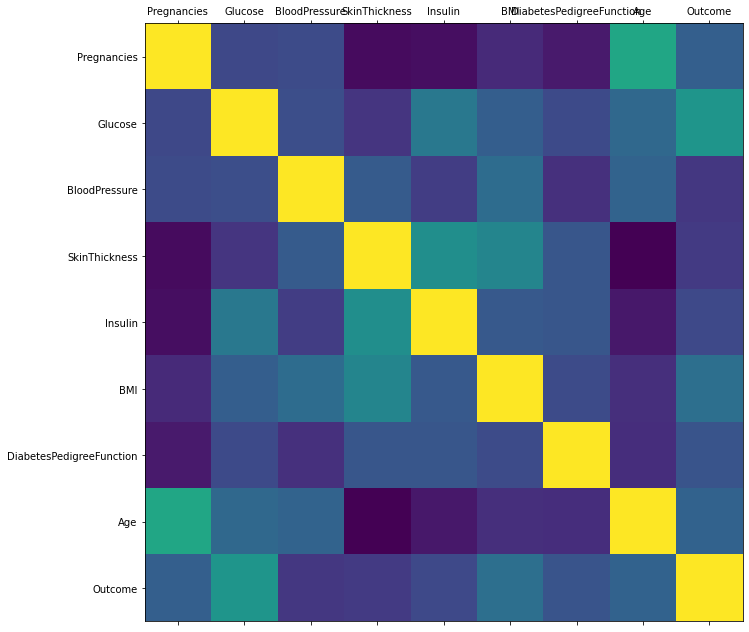

In [5]:
plot_corr(df)

In [6]:
df.corr

<bound method DataFrame.corr of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

In [7]:
#mengecek ditribusi
num_obs=len(df)
num_true=len(df[df['Outcome']==1])
num_false=len(df[df['Outcome']==0])
print('jumlah terkena diabetes: {0} ({1:2.2f}%)'.format(num_true,(num_true/num_obs)*100))
print('jumlah tidak terkena diabetes: {0} ({1:2.2f}%)'.format(num_false,(num_false/num_obs)*100))

jumlah terkena diabetes: 268 (34.90%)
jumlah tidak terkena diabetes: 500 (65.10%)


In [8]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
from sklearn.model_selection import train_test_split
#memasukan feature yang dipilih 
feature_col_names=['Pregnancies','Glucose','BloodPressure',
                  'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction',
                  'Age']
predicted_class_names=['Outcome']
x=df[feature_col_names].values
y=df[predicted_class_names].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=42)



In [10]:
print("{0:0.2f}% ada pada training set".format((len(x_train)/len(df.index))*100))
print("{0:0.2f}% ada pada test set".format((len(x_test)/len(df.index))*100))

69.92% ada pada training set
30.08% ada pada test set


In [11]:
print('jumlah terkena diabetes: {0} ({1:2.2f}%)'.format(len(df.loc[df['Outcome']==1]),(len(df.loc[df['Outcome']==1]) /len(df.index))*100))
print('jumlah tidak terkena diabetes: {0} ({1:2.2f}%)'.format(len(df.loc[df['Outcome']==0]),(len(df.loc[df['Outcome']==0]) /len(df.index))*100))
print("")
print('training true: {0} ({1:2.2f}%)'.format(len(y_train[y_train[:]==1]),(len(y_train[y_train[:]==1]) /len(y_train))*100))
print('training false: {0} ({1:2.2f}%)'.format(len(y_train[y_train[:]==0]),(len(y_train[y_train[:]==0]) /len(y_train))*100))
print('')
print('testing true: {0} ({1:2.2f}%)'.format(len(y_test[y_test[:]==1]),(len(y_test[y_test[:]==1]) /len(y_test))*100))
print('testing false: {0} ({1:2.2f}%)'.format(len(y_test[y_test[:]==0]),(len(y_test[y_test[:]==0]) /len(y_test))*100))
      

jumlah terkena diabetes: 268 (34.90%)
jumlah tidak terkena diabetes: 500 (65.10%)

training true: 188 (35.01%)
training false: 349 (64.99%)

testing true: 80 (34.63%)
testing false: 151 (65.37%)


In [12]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
#mengisi data yang kosong dengan nilai mean
from sklearn.impute import SimpleImputer
fill_0=SimpleImputer(missing_values=0, strategy='mean')
x_train=fill_0.fit_transform(x_train)
x_test=fill_0.fit_transform(x_test)

In [14]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
from sklearn.naive_bayes import GaussianNB
nb_model=GaussianNB()
nb_model.fit(x_train,y_train.ravel())

GaussianNB()

In [16]:
#Uji akurasi
nb_predict_train=nb_model.predict(x_train)
from sklearn import metrics
print('Accuracy :', metrics.accuracy_score(y_train,nb_predict_train))


Accuracy : 0.7541899441340782


In [17]:
nb_predict_test=nb_model.predict(x_test)
print('Accuracy test :', metrics.accuracy_score(y_test,nb_predict_test))

Accuracy test : 0.7359307359307359


In [18]:
#conffusion matrix
metrics.confusion_matrix(y_test,nb_predict_test)

array([[118,  33],
       [ 28,  52]], dtype=int64)

In [19]:
print(metrics.classification_report(y_test,nb_predict_test))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79       151
           1       0.61      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231



In [20]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(random_state=42, n_estimators=10)
rf_model.fit(x_train,y_train.ravel())


RandomForestClassifier(n_estimators=10, random_state=42)

In [21]:
rf_predict_train=rf_model.predict(x_train)
print('Accuracy :',metrics.accuracy_score(y_train,rf_predict_train))
rf_predict_test=rf_model.predict(x_test)
print('Accuracy test :', metrics.accuracy_score(y_test,rf_predict_test))

Accuracy : 0.9869646182495344
Accuracy test : 0.70995670995671


In [22]:
metrics.confusion_matrix(y_test,rf_predict_test)

array([[121,  30],
       [ 37,  43]], dtype=int64)

In [23]:
print(metrics.classification_report(y_test,rf_predict_test))

              precision    recall  f1-score   support

           0       0.77      0.80      0.78       151
           1       0.59      0.54      0.56        80

    accuracy                           0.71       231
   macro avg       0.68      0.67      0.67       231
weighted avg       0.70      0.71      0.71       231



In [24]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression(C=0.7, random_state=42, solver='liblinear', max_iter=10000)
lr_model.fit(x_train,y_train.ravel())
lr_predict_test=lr_model.predict(x_test)

In [25]:
metrics.confusion_matrix(y_test,lr_predict_test)

array([[128,  23],
       [ 36,  44]], dtype=int64)

In [26]:
print(metrics.classification_report(y_test,lr_predict_test))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81       151
           1       0.66      0.55      0.60        80

    accuracy                           0.74       231
   macro avg       0.72      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231



In [34]:
#Cross VALIDATION
from sklearn.linear_model import LogisticRegressionCV
lr_cv_model=LogisticRegressionCV(n_jobs=-1, random_state=0, 
                                Cs=3,cv=7, refit=False, class_weight='balenced',
                                max_iter=100)
lr_cv_model.fit(x_train,y_train.ravel())


LogisticRegressionCV(Cs=3, class_weight='balenced', cv=7, n_jobs=-1,
                     random_state=0, refit=False)

In [35]:
lr_cv_predict_test=lr_cv_model.predict(x_test)
print('Accuracy :',metrics.accuracy_score(y_test,lr_cv_predict_test))
print(metrics.confusion_matrix(y_test, lr_cv_predict_test))
print(metrics.classification_report(y_test,lr_cv_predict_test))

Accuracy : 0.7445887445887446
[[125  26]
 [ 33  47]]
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       151
           1       0.64      0.59      0.61        80

    accuracy                           0.74       231
   macro avg       0.72      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



In [39]:
from sklearn.externals import joblib.
joblib.dump(lr_cv_model, ".\dataset\kode-trained-model.pkl")

SyntaxError: invalid syntax (<ipython-input-39-0a0244ee2f13>, line 1)